# [DEV][PPO] Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import torch
import numpy as np

# widget bar to display progress
#!pip install progressbar
import progressbar as pb

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Crawler.app', worker_id=101)
#env = UnityEnvironment(file_name='Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: CrawlerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 129
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 20
        Vector Action descriptions: , , , , , , , , , , , , , , , , , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# name of brain
print('Name of brain:', brain_name)

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Name of brain: CrawlerBrain
Number of agents: 12
Size of each action: 20
There are 12 agents. Each observes a state with length: 129
The state for the first agent looks like: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.25000000e+00
  1.00000000e+00  0.00000000e+00  1.78813934e-07  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.06093168e-01 -1.42857209e-01 -6.06078804e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.33339906e+00 -1.42857209e-01
 -1.33341408e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [4]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
#env.close()

Total score (averaged over agents) this episode: 0.5481152724629889


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
def saveTrainedModel(agent, path):
    state_dicts = {'model': agent.model_local.state_dict()}
    torch.save(state_dicts, path)
    
def loadTrainedModel(agent, path):
    state_dicts = torch.load(path,map_location={'cuda:0': 'cpu'})

    agent.model_local.load_state_dict(state_dicts['model'])
    
    return agent

In [6]:
from PPO_agent import PPO_Agent
#import PPO_util 

model_dir = 'saved_models/'
model_name = 'unity_continuous_' + str(brain_name) + '_' + str(num_agents) + '_agents.pt'

agent = PPO_Agent(env, state_size, action_size, num_agents=num_agents, seed=1234)
#agent = loadTrainedModel(agent, model_dir+model_name)

current device:  cpu


In [ ]:
episode_max = 5000 # training loop max iterations

widget = ['training loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA() ]
timer = pb.ProgressBar(widgets=widget, maxval=episode_max).start()

# keep track of progress
mean_rewards = []
e = 0

while e < episode_max:

    # collect trajectories
    agent.step()
    episode_reward = agent.episodic_rewards
    
    # display some progress every 20 iterations
    if agent.is_training:

        # get the average reward of the parallel environments
        mean_rewards.append(np.mean(episode_reward))        
        
        if (e+1)%1 ==0 :
            print("Episode: {}   score: {:.2f}   Avg score (100e): {:.2f}   "
                  "actor gain: {:.2f}   critic loss: {:.2f}".format(e+1, np.mean(episode_reward),
                                                                    np.mean(mean_rewards[-100:]),
                                                                    np.mean(agent.actor_gain), 
                                                                    np.mean(agent.critic_loss)))
            
        if np.mean(mean_rewards[-100:]) >= 100:
            print("Average score over all agents across 100th episodes > 100. Problem Solved!")
            break
                
        timer.update(e)
        
        e += 1
    else:
        print('\rFetching experiences... {} '.format(len(agent.memory.memory)), end="")
        
    #update progress widget bar
    #timer.update(e+1)
    
timer.finish()


Prefetch completed. Training starts! 
Number of Agents:  12
Device:  cpu


Episode: 1   score: 3.07   Avg score (100e): 3.07   actor gain: -0.31   critic loss: 3.85   eps: 1.00


Episode: 2   score: 2.24   Avg score (100e): 2.66   actor gain: -0.32   critic loss: 2.72   eps: 1.00


Episode: 3   score: 2.12   Avg score (100e): 2.48   actor gain: -0.31   critic loss: 2.20   eps: 1.00


Episode: 4   score: 2.07   Avg score (100e): 2.37   actor gain: -0.30   critic loss: 1.87   eps: 1.00


Episode: 5   score: 2.10   Avg score (100e): 2.32   actor gain: -0.29   critic loss: 1.67   eps: 1.00


Episode: 6   score: 2.15   Avg score (100e): 2.29   actor gain: -0.31   critic loss: 1.54   eps: 1.00


Episode: 7   score: 2.22   Avg score (100e): 2.28   actor gain: -0.31   critic loss: 1.43   eps: 1.00


Episode: 8   score: 2.23   Avg score (100e): 2.27   actor gain: -0.31   critic loss: 1.35   eps: 1.00


Episode: 9   score: 2.26   Avg score (100e): 2.27   actor gain: -0.30   critic loss: 1.28   eps: 1.00


Episode: 10   score: 2.28   Avg score (100e): 2.27   actor gain: -0.29   critic loss: 1.23   eps: 1.00


Episode: 11   score: 2.26   Avg score (100e): 2.27   actor gain: -0.29   critic loss: 1.19   eps: 1.00


Episode: 12   score: 2.29   Avg score (100e): 2.27   actor gain: -0.29   critic loss: 1.15   eps: 0.99


Episode: 13   score: 2.30   Avg score (100e): 2.27   actor gain: -0.28   critic loss: 1.12   eps: 0.99


Episode: 14   score: 2.30   Avg score (100e): 2.28   actor gain: -0.28   critic loss: 1.09   eps: 0.99


Episode: 15   score: 2.35   Avg score (100e): 2.28   actor gain: -0.28   critic loss: 1.06   eps: 0.99


Episode: 16   score: 2.37   Avg score (100e): 2.29   actor gain: -0.28   critic loss: 1.03   eps: 0.99


Episode: 17   score: 2.41   Avg score (100e): 2.29   actor gain: -0.27   critic loss: 1.01   eps: 0.99


Episode: 18   score: 2.39   Avg score (100e): 2.30   actor gain: -0.27   critic loss: 1.00   eps: 0.99


Episode: 19   score: 2.40   Avg score (100e): 2.30   actor gain: -0.27   critic loss: 0.98   eps: 0.99


Episode: 20   score: 2.39   Avg score (100e): 2.31   actor gain: -0.27   critic loss: 0.96   eps: 0.99


Episode: 21   score: 2.38   Avg score (100e): 2.31   actor gain: -0.27   critic loss: 0.95   eps: 0.99


Episode: 22   score: 2.40   Avg score (100e): 2.32   actor gain: -0.27   critic loss: 0.93   eps: 0.99


Episode: 23   score: 2.43   Avg score (100e): 2.32   actor gain: -0.27   critic loss: 0.92   eps: 0.99


Episode: 24   score: 2.45   Avg score (100e): 2.33   actor gain: -0.27   critic loss: 0.91   eps: 0.99


Episode: 25   score: 2.47   Avg score (100e): 2.33   actor gain: -0.27   critic loss: 0.90   eps: 0.99


Episode: 26   score: 2.50   Avg score (100e): 2.34   actor gain: -0.26   critic loss: 0.77   eps: 0.99


Episode: 27   score: 2.52   Avg score (100e): 2.35   actor gain: -0.26   critic loss: 0.73   eps: 0.99


Episode: 28   score: 2.53   Avg score (100e): 2.35   actor gain: -0.26   critic loss: 0.71   eps: 0.99


Episode: 29   score: 2.56   Avg score (100e): 2.36   actor gain: -0.25   critic loss: 0.70   eps: 0.99


Episode: 30   score: 2.59   Avg score (100e): 2.37   actor gain: -0.25   critic loss: 0.68   eps: 0.99


Episode: 31   score: 2.62   Avg score (100e): 2.38   actor gain: -0.25   critic loss: 0.67   eps: 0.99


Episode: 32   score: 2.65   Avg score (100e): 2.38   actor gain: -0.24   critic loss: 0.67   eps: 0.98


Episode: 33   score: 2.69   Avg score (100e): 2.39   actor gain: -0.24   critic loss: 0.66   eps: 0.98


Episode: 34   score: 2.71   Avg score (100e): 2.40   actor gain: -0.24   critic loss: 0.65   eps: 0.98


Episode: 35   score: 2.73   Avg score (100e): 2.41   actor gain: -0.24   critic loss: 0.65   eps: 0.98


Episode: 36   score: 2.75   Avg score (100e): 2.42   actor gain: -0.24   critic loss: 0.64   eps: 0.98


Episode: 37   score: 2.80   Avg score (100e): 2.43   actor gain: -0.24   critic loss: 0.63   eps: 0.98


Episode: 38   score: 2.82   Avg score (100e): 2.44   actor gain: -0.24   critic loss: 0.63   eps: 0.98


Episode: 39   score: 2.85   Avg score (100e): 2.45   actor gain: -0.24   critic loss: 0.62   eps: 0.98


Episode: 40   score: 2.88   Avg score (100e): 2.46   actor gain: -0.23   critic loss: 0.62   eps: 0.98


Episode: 41   score: 2.90   Avg score (100e): 2.47   actor gain: -0.23   critic loss: 0.61   eps: 0.98


Episode: 42   score: 2.94   Avg score (100e): 2.48   actor gain: -0.23   critic loss: 0.61   eps: 0.98


Episode: 43   score: 2.98   Avg score (100e): 2.50   actor gain: -0.23   critic loss: 0.60   eps: 0.98


Episode: 44   score: 3.02   Avg score (100e): 2.51   actor gain: -0.23   critic loss: 0.60   eps: 0.98


Episode: 45   score: 3.06   Avg score (100e): 2.52   actor gain: -0.23   critic loss: 0.60   eps: 0.98


Episode: 46   score: 3.10   Avg score (100e): 2.53   actor gain: -0.23   critic loss: 0.59   eps: 0.98


Episode: 47   score: 3.15   Avg score (100e): 2.55   actor gain: -0.23   critic loss: 0.59   eps: 0.98


Episode: 48   score: 3.18   Avg score (100e): 2.56   actor gain: -0.22   critic loss: 0.58   eps: 0.98


Episode: 49   score: 3.21   Avg score (100e): 2.57   actor gain: -0.22   critic loss: 0.58   eps: 0.98


Episode: 50   score: 3.25   Avg score (100e): 2.59   actor gain: -0.22   critic loss: 0.58   eps: 0.98


Episode: 51   score: 3.28   Avg score (100e): 2.60   actor gain: -0.22   critic loss: 0.57   eps: 0.98


Episode: 52   score: 3.31   Avg score (100e): 2.61   actor gain: -0.22   critic loss: 0.57   eps: 0.97


Episode: 53   score: 3.34   Avg score (100e): 2.63   actor gain: -0.22   critic loss: 0.57   eps: 0.97


Episode: 54   score: 3.36   Avg score (100e): 2.64   actor gain: -0.22   critic loss: 0.56   eps: 0.97


Episode: 55   score: 3.39   Avg score (100e): 2.65   actor gain: -0.22   critic loss: 0.56   eps: 0.97


Episode: 56   score: 3.40   Avg score (100e): 2.67   actor gain: -0.21   critic loss: 0.56   eps: 0.97


Episode: 57   score: 3.43   Avg score (100e): 2.68   actor gain: -0.21   critic loss: 0.56   eps: 0.97


Episode: 58   score: 3.45   Avg score (100e): 2.69   actor gain: -0.21   critic loss: 0.55   eps: 0.97


Episode: 59   score: 3.48   Avg score (100e): 2.71   actor gain: -0.21   critic loss: 0.55   eps: 0.97


Episode: 60   score: 3.51   Avg score (100e): 2.72   actor gain: -0.21   critic loss: 0.55   eps: 0.97


Episode: 61   score: 3.53   Avg score (100e): 2.73   actor gain: -0.21   critic loss: 0.54   eps: 0.97


Episode: 62   score: 3.57   Avg score (100e): 2.75   actor gain: -0.21   critic loss: 0.54   eps: 0.97


Episode: 63   score: 3.59   Avg score (100e): 2.76   actor gain: -0.21   critic loss: 0.54   eps: 0.97


Episode: 64   score: 3.61   Avg score (100e): 2.77   actor gain: -0.21   critic loss: 0.54   eps: 0.97


Episode: 65   score: 3.64   Avg score (100e): 2.79   actor gain: -0.21   critic loss: 0.53   eps: 0.97


Episode: 66   score: 3.67   Avg score (100e): 2.80   actor gain: -0.21   critic loss: 0.53   eps: 0.97


Episode: 67   score: 3.69   Avg score (100e): 2.81   actor gain: -0.21   critic loss: 0.53   eps: 0.97


Episode: 68   score: 3.72   Avg score (100e): 2.83   actor gain: -0.21   critic loss: 0.53   eps: 0.97


Episode: 69   score: 3.74   Avg score (100e): 2.84   actor gain: -0.21   critic loss: 0.52   eps: 0.97


Episode: 70   score: 3.76   Avg score (100e): 2.85   actor gain: -0.20   critic loss: 0.52   eps: 0.97


Episode: 71   score: 3.78   Avg score (100e): 2.87   actor gain: -0.20   critic loss: 0.52   eps: 0.97


Episode: 72   score: 3.80   Avg score (100e): 2.88   actor gain: -0.20   critic loss: 0.52   eps: 0.97


Episode: 73   score: 3.83   Avg score (100e): 2.89   actor gain: -0.20   critic loss: 0.51   eps: 0.96


Episode: 74   score: 3.86   Avg score (100e): 2.91   actor gain: -0.20   critic loss: 0.51   eps: 0.96


Episode: 75   score: 3.89   Avg score (100e): 2.92   actor gain: -0.20   critic loss: 0.51   eps: 0.96


Episode: 76   score: 3.92   Avg score (100e): 2.93   actor gain: -0.20   critic loss: 0.51   eps: 0.96


Episode: 77   score: 3.96   Avg score (100e): 2.95   actor gain: -0.20   critic loss: 0.51   eps: 0.96


Episode: 78   score: 4.01   Avg score (100e): 2.96   actor gain: -0.20   critic loss: 0.51   eps: 0.96


Episode: 79   score: 4.06   Avg score (100e): 2.97   actor gain: -0.20   critic loss: 0.51   eps: 0.96


Episode: 80   score: 4.11   Avg score (100e): 2.99   actor gain: -0.20   critic loss: 0.50   eps: 0.96


Episode: 81   score: 4.17   Avg score (100e): 3.00   actor gain: -0.20   critic loss: 0.50   eps: 0.96


Episode: 82   score: 4.22   Avg score (100e): 3.02   actor gain: -0.20   critic loss: 0.50   eps: 0.96


Episode: 83   score: 4.26   Avg score (100e): 3.03   actor gain: -0.20   critic loss: 0.50   eps: 0.96


Episode: 84   score: 4.32   Avg score (100e): 3.05   actor gain: -0.20   critic loss: 0.50   eps: 0.96


Episode: 85   score: 4.35   Avg score (100e): 3.06   actor gain: -0.20   critic loss: 0.50   eps: 0.96


Episode: 86   score: 4.40   Avg score (100e): 3.08   actor gain: -0.20   critic loss: 0.50   eps: 0.96


Episode: 87   score: 4.44   Avg score (100e): 3.09   actor gain: -0.19   critic loss: 0.49   eps: 0.96


Episode: 88   score: 4.49   Avg score (100e): 3.11   actor gain: -0.19   critic loss: 0.49   eps: 0.96


Episode: 89   score: 4.54   Avg score (100e): 3.13   actor gain: -0.19   critic loss: 0.49   eps: 0.96


Episode: 90   score: 4.59   Avg score (100e): 3.14   actor gain: -0.19   critic loss: 0.49   eps: 0.96


Episode: 91   score: 4.64   Avg score (100e): 3.16   actor gain: -0.19   critic loss: 0.49   eps: 0.96


Episode: 92   score: 4.69   Avg score (100e): 3.17   actor gain: -0.19   critic loss: 0.49   eps: 0.96


Episode: 93   score: 4.74   Avg score (100e): 3.19   actor gain: -0.19   critic loss: 0.48   eps: 0.96


Episode: 94   score: 4.78   Avg score (100e): 3.21   actor gain: -0.19   critic loss: 0.48   eps: 0.95


Episode: 95   score: 4.83   Avg score (100e): 3.23   actor gain: -0.20   critic loss: 0.48   eps: 0.95


Episode: 96   score: 4.88   Avg score (100e): 3.24   actor gain: -0.20   critic loss: 0.48   eps: 0.95


Episode: 97   score: 4.92   Avg score (100e): 3.26   actor gain: -0.20   critic loss: 0.48   eps: 0.95


Episode: 98   score: 4.97   Avg score (100e): 3.28   actor gain: -0.20   critic loss: 0.48   eps: 0.95


Episode: 99   score: 5.01   Avg score (100e): 3.30   actor gain: -0.20   critic loss: 0.48   eps: 0.95


Episode: 100   score: 5.05   Avg score (100e): 3.31   actor gain: -0.19   critic loss: 0.48   eps: 0.95


Episode: 101   score: 5.10   Avg score (100e): 3.33   actor gain: -0.19   critic loss: 0.48   eps: 0.95


Episode: 102   score: 5.15   Avg score (100e): 3.36   actor gain: -0.19   critic loss: 0.47   eps: 0.95


Episode: 103   score: 5.20   Avg score (100e): 3.39   actor gain: -0.19   critic loss: 0.47   eps: 0.95


Episode: 104   score: 5.26   Avg score (100e): 3.42   actor gain: -0.18   critic loss: 0.47   eps: 0.95


Episode: 105   score: 5.29   Avg score (100e): 3.46   actor gain: -0.18   critic loss: 0.47   eps: 0.95


Episode: 106   score: 5.34   Avg score (100e): 3.49   actor gain: -0.18   critic loss: 0.47   eps: 0.95


Episode: 107   score: 5.38   Avg score (100e): 3.52   actor gain: -0.18   critic loss: 0.47   eps: 0.95


Episode: 108   score: 5.42   Avg score (100e): 3.55   actor gain: -0.18   critic loss: 0.46   eps: 0.95


Episode: 109   score: 5.46   Avg score (100e): 3.58   actor gain: -0.18   critic loss: 0.46   eps: 0.95


Episode: 110   score: 5.49   Avg score (100e): 3.62   actor gain: -0.18   critic loss: 0.46   eps: 0.95


Episode: 111   score: 5.53   Avg score (100e): 3.65   actor gain: -0.18   critic loss: 0.46   eps: 0.95


Episode: 112   score: 5.57   Avg score (100e): 3.68   actor gain: -0.18   critic loss: 0.46   eps: 0.95


Episode: 113   score: 5.60   Avg score (100e): 3.71   actor gain: -0.18   critic loss: 0.46   eps: 0.95


Episode: 114   score: 5.63   Avg score (100e): 3.75   actor gain: -0.18   critic loss: 0.46   eps: 0.95


Episode: 115   score: 5.65   Avg score (100e): 3.78   actor gain: -0.18   critic loss: 0.46   eps: 0.94


Episode: 116   score: 5.68   Avg score (100e): 3.81   actor gain: -0.18   critic loss: 0.46   eps: 0.94


Episode: 117   score: 5.71   Avg score (100e): 3.85   actor gain: -0.17   critic loss: 0.46   eps: 0.94


Episode: 118   score: 5.75   Avg score (100e): 3.88   actor gain: -0.17   critic loss: 0.46   eps: 0.94


Episode: 119   score: 5.79   Avg score (100e): 3.91   actor gain: -0.17   critic loss: 0.45   eps: 0.94


Episode: 120   score: 5.81   Avg score (100e): 3.95   actor gain: -0.16   critic loss: 0.45   eps: 0.94


Episode: 121   score: 5.84   Avg score (100e): 3.98   actor gain: -0.16   critic loss: 0.45   eps: 0.94


Episode: 122   score: 5.86   Avg score (100e): 4.02   actor gain: -0.16   critic loss: 0.45   eps: 0.94


Episode: 123   score: 5.90   Avg score (100e): 4.05   actor gain: -0.16   critic loss: 0.45   eps: 0.94


Episode: 124   score: 5.94   Avg score (100e): 4.09   actor gain: -0.16   critic loss: 0.45   eps: 0.94


Episode: 125   score: 5.97   Avg score (100e): 4.12   actor gain: -0.16   critic loss: 0.45   eps: 0.94


Episode: 126   score: 5.99   Avg score (100e): 4.16   actor gain: -0.16   critic loss: 0.44   eps: 0.94


Episode: 127   score: 6.01   Avg score (100e): 4.19   actor gain: -0.16   critic loss: 0.44   eps: 0.94


Episode: 128   score: 6.04   Avg score (100e): 4.23   actor gain: -0.16   critic loss: 0.44   eps: 0.94


Episode: 129   score: 6.06   Avg score (100e): 4.26   actor gain: -0.16   critic loss: 0.44   eps: 0.94


Episode: 130   score: 6.08   Avg score (100e): 4.30   actor gain: -0.16   critic loss: 0.44   eps: 0.94


Episode: 131   score: 6.11   Avg score (100e): 4.33   actor gain: -0.16   critic loss: 0.44   eps: 0.94


Episode: 132   score: 6.14   Avg score (100e): 4.37   actor gain: -0.16   critic loss: 0.44   eps: 0.94


Episode: 133   score: 6.16   Avg score (100e): 4.40   actor gain: -0.16   critic loss: 0.44   eps: 0.94


Episode: 134   score: 6.18   Avg score (100e): 4.44   actor gain: -0.16   critic loss: 0.44   eps: 0.94


Episode: 135   score: 6.21   Avg score (100e): 4.47   actor gain: -0.16   critic loss: 0.44   eps: 0.94


Episode: 136   score: 6.24   Avg score (100e): 4.51   actor gain: -0.16   critic loss: 0.44   eps: 0.93


Episode: 137   score: 6.27   Avg score (100e): 4.54   actor gain: -0.16   critic loss: 0.44   eps: 0.93


Episode: 138   score: 6.31   Avg score (100e): 4.58   actor gain: -0.16   critic loss: 0.44   eps: 0.93


Episode: 139   score: 6.34   Avg score (100e): 4.61   actor gain: -0.16   critic loss: 0.44   eps: 0.93


Episode: 140   score: 6.36   Avg score (100e): 4.65   actor gain: -0.16   critic loss: 0.44   eps: 0.93


Episode: 141   score: 6.39   Avg score (100e): 4.68   actor gain: -0.16   critic loss: 0.44   eps: 0.93


Episode: 142   score: 6.42   Avg score (100e): 4.72   actor gain: -0.16   critic loss: 0.43   eps: 0.93


Episode: 143   score: 6.44   Avg score (100e): 4.75   actor gain: -0.16   critic loss: 0.43   eps: 0.93


Episode: 144   score: 6.48   Avg score (100e): 4.78   actor gain: -0.16   critic loss: 0.43   eps: 0.93


Episode: 145   score: 6.49   Avg score (100e): 4.82   actor gain: -0.16   critic loss: 0.43   eps: 0.93


Episode: 146   score: 6.51   Avg score (100e): 4.85   actor gain: -0.16   critic loss: 0.43   eps: 0.93


In [ ]:
saveTrainedModel(agent, model_dir + model_name)

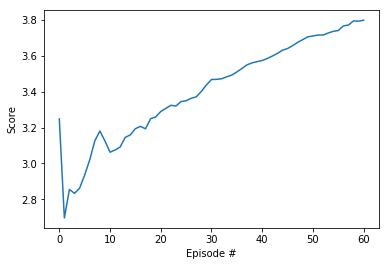

In [9]:
# plot the scores
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(mean_rewards)), mean_rewards)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
import torch
print(torch.__version__)

In [10]:
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
for _ in range(10):
    agent.step(eps=0.01, train_mode=False)             # lower eps and train_mode=False
    episode_reward = agent.running_rewards
    scores += episode_reward                           # update the score (for each agent)
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

KeyboardInterrupt: 

In [ ]:
env.close()